# MOOD DETECTION MODEL

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization,Activation
from keras import Sequential
from keras import optimizers
from keras.optimizers import Adam
import PIL
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
import cv2

In [2]:
train_data_dir = "dataset//training_set//"
test_data_dir = "dataset//test_set//"
epochs = 30
batch_size = 128
image_height, image_width = 48,48


In [3]:
import keras.backend as k
k.image_data_format()

'channels_last'

In [4]:
input_shape=(image_width,image_height,3)

In [5]:
train_data = ImageDataGenerator()
test_data = ImageDataGenerator()

In [6]:
train_images = train_data.flow_from_directory(train_data_dir,
                                              target_size = (image_width,image_height),
                                              color_mode='grayscale',
                                              batch_size=batch_size,
                                              class_mode='categorical', 
                                              shuffle=True)
test_images = test_data.flow_from_directory(test_data_dir,
                                            target_size = (image_width,image_height),
                                            color_mode='grayscale',
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)
y_true_labels = train_images.classes

Found 18006 images belonging to 6 classes.
Found 6006 images belonging to 6 classes.


In [7]:
type(y_true_labels)

numpy.ndarray

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_images:
        Imaa = X_batch[0]
        plt.imshow(Imaa)
        break
plt.tight_layout()
plt.show()

In [9]:
no_of_classes = 6
model = Sequential()
#1st CNN Layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
#3rd CNN Layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
#4th CNN Layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
#Fully Connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
    
#Fully Connected 2nd Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
          
model.add(Dense(no_of_classes,activation='softmax'))
          
opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("Model.h5",monitor='val_acc', verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                            min_delta=0,
                            patience=3,
                            verbose=1,
                            restore_best_weights=True
                            )

reduce_learningrate = ReduceLROnPlateau(monitor='value_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       min_delta=0.0001)

callback_list = [early_stopping,checkpoint,reduce_learningrate]

epochs=48

In [11]:
training = model.fit_generator(train_images,
                             steps_per_epoch = train_images.n//train_images.batch_size,
                             epochs=epochs,
                             validation_data = test_images,
                             validation_steps = test_images.n//test_images.batch_size,
                             ) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
140/140 [==============================] - 973s 7s/step - loss: 2.0273 - accuracy: 0.2132 - val_loss: 1.7763 - val_accuracy: 0.2315
Epoch 2/48
140/140 [==============================] - 686s 5s/step - loss: 1.8744 - accuracy: 0.2484 - val_loss: 1.6826 - val_accuracy: 0.2974
Epoch 3/48
140/140 [==============================] - 668s 5s/step - loss: 1.7900 - accuracy: 0.2796 - val_loss: 1.6589 - val_accuracy: 0.3032
Epoch 4/48
140/140 [==============================] - 669s 5s/step - loss: 1.7090 - accuracy: 0.3135 - val_loss: 1.6735 - val_accuracy: 0.3188
Epoch 5/48
140/140 [==============================] - 674s 5s/step - loss: 1.6714 - accuracy: 0.3368 - val_loss: 1.6360 - val_accuracy: 0.3381
Epoch 6/48
140/140 [==============================] - 968s 7s/step - loss: 1.6095 - accuracy: 0.3578 - val_loss: 1.6486 - val_accuracy: 0.3398
Epoch 7/48
140/140 [==============================] - 669s 5s/step

In [12]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

TypeError: cannot pickle '_thread.RLock' object

In [13]:
model.save("myModel")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: myModel\assets


In [14]:
my_model = keras.models.load_model("myModel")

In [27]:
my_model.evaluate(test_images)

47/47 [==============================] - 34s 729ms/step - loss: 1.1589 - accuracy: 0.5794


[1.158909559249878, 0.5794205665588379]

In [16]:
imgp = "abc.jpg"
img_pred = cv2.imread(imgp)
img_pred = cv2.cvtColor(img_pred, cv2.COLOR_RGB2GRAY)
img_pred = keras.preprocessing.image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)
reslt = my_model.predict(img_pred)
imgin = image.imread(imgp)

In [17]:
print(*reslt)

[0.004775   0.03754085 0.8062912  0.00291786 0.14690578 0.00156928]


In [18]:
img_pred

array([[[[193.],
         [199.],
         [202.],
         ...,
         [214.],
         [217.],
         [220.]],

        [[194.],
         [200.],
         [203.],
         ...,
         [214.],
         [217.],
         [218.]],

        [[193.],
         [198.],
         [201.],
         ...,
         [214.],
         [216.],
         [215.]],

        ...,

        [[167.],
         [172.],
         [186.],
         ...,
         [238.],
         [238.],
         [236.]],

        [[168.],
         [172.],
         [184.],
         ...,
         [238.],
         [238.],
         [237.]],

        [[172.],
         [173.],
         [180.],
         ...,
         [240.],
         [238.],
         [239.]]]], dtype=float32)

{'loss': [2.0272979736328125, 1.874443769454956, 1.7900059223175049, 1.7089725732803345, 1.6713682413101196, 1.609481930732727, 1.5763574838638306, 1.532414197921753, 1.4983221292495728, 1.459710955619812, 1.4199117422103882, 1.3989863395690918, 1.3642891645431519, 1.3437689542770386, 1.312993049621582, 1.2861847877502441, 1.2712652683258057, 1.248932957649231, 1.2312052249908447, 1.2154312133789062, 1.1988447904586792, 1.184261441230774, 1.1665393114089966, 1.1413782835006714, 1.123570203781128, 1.1126245260238647, 1.0956240892410278, 1.0827293395996094, 1.0637757778167725, 1.0474803447723389, 1.032263159751892, 1.020796775817871, 1.0007688999176025, 0.9886813163757324, 0.9719820022583008, 0.9534345269203186, 0.9514409303665161, 0.928931713104248, 0.9151140451431274, 0.8959322571754456, 0.8846033215522766, 0.8636353015899658, 0.8472198843955994, 0.8361049294471741, 0.8260607719421387, 0.8078411817550659, 0.7860783338546753, 0.7764549851417542], 'accuracy': [0.2132229506969452, 0.24840

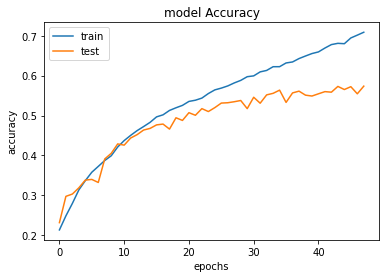

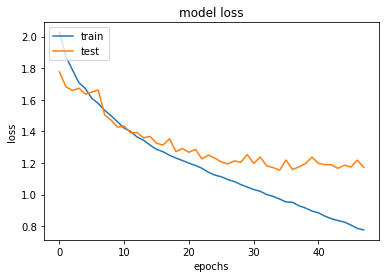

In [20]:
%matplotlib inline
print(training.history)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
